reference: https://www.kaggle.com/dgawlik/house-prices-eda

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from scipy.stats import skew, norm

import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
upload_train = files.upload()

Saving house-train.csv to house-train.csv


In [4]:
import pandas as pd
import io
train = pd.read_csv(io.BytesIO(upload_train['house-train.csv']), index_col=None)
train.shape

(1460, 81)

In [5]:
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']

In [9]:
for c in qualitative:
    train[c] = train[c].astype('category')
    if train[c].isnull().any():
        train[c] = train[c].cat.add_categories(['MISSING'])
        train[c] = train[c].fillna('MISSING')

In [10]:
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    pvals = []
    for c in qualitative:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(train)
a['disparity'] = np.log(1./a['pval'].values)
print(a)

          feature           pval   disparity
8    Neighborhood  1.558600e-225  517.637858
18      ExterQual  1.439551e-204  469.363028
21       BsmtQual  8.158548e-196  449.207612
30    KitchenQual  3.032213e-192  440.987045
34   GarageFinish  6.228747e-115  262.968110
32    FireplaceQu  2.971217e-107  245.287633
20     Foundation   5.791895e-91  207.778784
33     GarageType   6.117026e-87  198.513827
24   BsmtFinType1   2.386358e-71  162.613773
27      HeatingQC   2.667062e-67  153.292224
17     MasVnrType   1.054025e-64  147.312830
23   BsmtExposure   7.557758e-50  113.106680
42  SaleCondition   7.988268e-44   99.235770
15    Exterior1st   2.586089e-43   98.061012
16    Exterior2nd   4.842186e-43   97.433793
41       SaleType   5.039767e-42   95.091214
0        MSZoning   8.817634e-35   78.413725
12     HouseStyle   3.376777e-25   56.347706
35     GarageQual   5.388762e-25   55.880312
36     GarageCond   5.711746e-25   55.822103
3        LotShape   6.447524e-25   55.700931
28     Cen

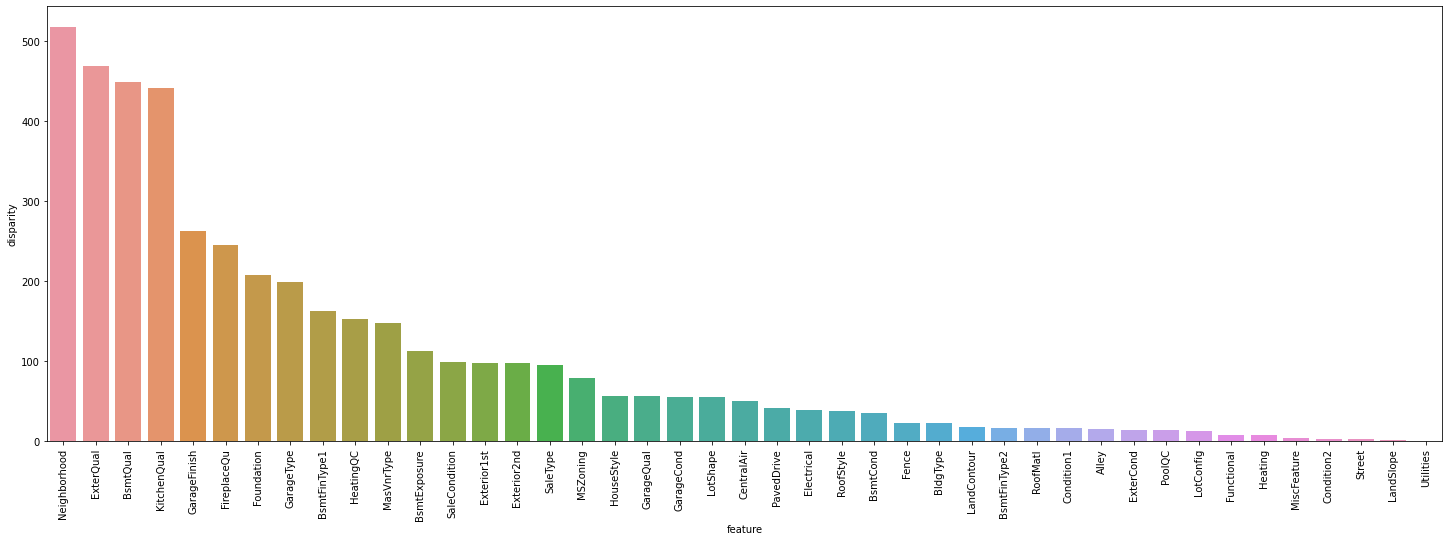

In [11]:
plt.figure(figsize = (25, 8)) 
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)